# Torque Curve Assesment

in 1968 Bud Tenny published some data on indoor flights. His data captured the flight path of a model in enough detail to be worthy of a deeper look. Specifically, he presented the model altitude, torque level, and prop rpm as a function of time. The only thing missing would have been an estimate of the flight speed during the flight. Considering how hard it was to gather this kind of data, we will work with it.

In order to work with Bud's data, we need to get it in a usable form. Fortunately, the Internet produced a nice desktop application we can use: *WebAppDigitizer* which is free, works on all platforms, and (despite the name) does not depend on the web!

This application lets you use your mouse to select data points on an image. You identify points on the axes of a plot so the program can properly scale your data, then it will export all of your points into a standard **JSON** file. With a little Python code that we will show, you get your data in a nice usable form! This only takes minutes once you get used to the program.

Let's see some code that will procss a **JSON** file produced by this program.

## Step 1: Find the data

In [1]:
from pathlib import Path
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline


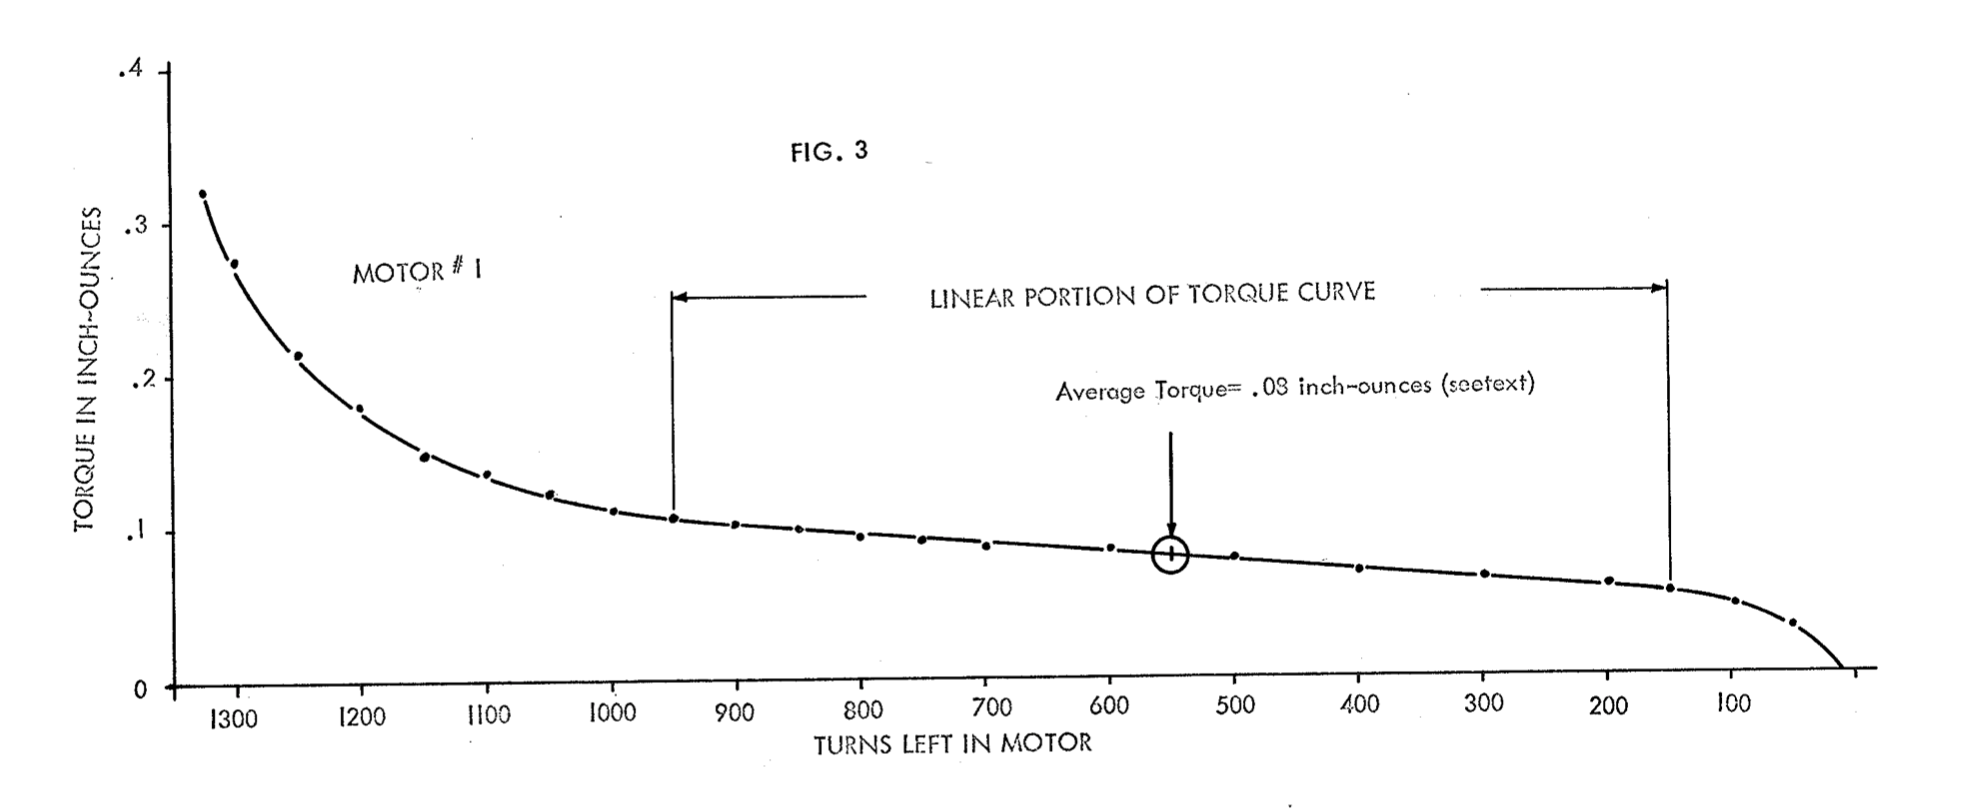

In [2]:
cwd = !pwd
book_path = cwd[0]
bpath = Path(book_path)
datadir = bpath / '..' / 'mmpower' / 'data'
curve = datadir / 'torque-curve.png'
Image(filename=curve)

In [4]:
DATA = datadir / 'torque-curve.json'
with open(DATA,'r') as fin:
    raw_data = json.load(fin)

This loads a lot of data, most of which we do not care about. A little digging tells us that we only need a portion of this.

In [5]:
points = raw_data['datasetColl'][0]['data']

We are closer. The actual data is a list of values under the key 'values':

In [6]:
for p in points:
    print(p['value'])

[1323.8540421329335, 0.3214399750499373]
[1301.300967557493, 0.2752585970045074]
[1284.816104671454, 0.24956300262124176]
[1257.9145905887772, 0.21865759751687472]
[1228.8477674891774, 0.19453920352865178]
[1197.6512783194353, 0.1738039192390231]
[1153.8906504095228, 0.15294388463566227]
[1116.3586274495246, 0.13725207731549205]
[1082.9433648426887, 0.128409656268332]
[1032.8115601957393, 0.11599700005197933]
[980.5322680052575, 0.10866940424299582]
[942.8933162049175, 0.1031893011754747]
[880.1082654508464, 0.0991616481892641]
[840.3396475803639, 0.09706465482033733]
[792.2127586898249, 0.09318254386681418]
[744.0680483258956, 0.09100238362206597]
[689.6590900652714, 0.08705789751167675]
[605.9338080775831, 0.0828223273359126]
[507.5860071731431, 0.07503731370991096]
[421.76670206209315, 0.07078095181519134]
[373.6398131715539, 0.06689884086166825]
[306.6667161707594, 0.06282960443754693]
[250.1637347867736, 0.0588643266082024]
[168.53247592244702, 0.054649548151393446]
[91.1783706717

The data can now be captured. We need the **x** and **y** values in separate lists:

In [7]:
x1 = []
y1 = []
for p in points:
    item = p['value']
    #if not isinstance(item,list): continue
    x1.append(item[0])
    y1.append(item[1])
print("xp=",x1)
print("yp=",y1)

xp= [1323.8540421329335, 1301.300967557493, 1284.816104671454, 1257.9145905887772, 1228.8477674891774, 1197.6512783194353, 1153.8906504095228, 1116.3586274495246, 1082.9433648426887, 1032.8115601957393, 980.5322680052575, 942.8933162049175, 880.1082654508464, 840.3396475803639, 792.2127586898249, 744.0680483258956, 689.6590900652714, 605.9338080775831, 507.5860071731431, 421.76670206209315, 373.6398131715539, 306.6667161707594, 250.1637347867736, 168.53247592244702, 91.17837067179539, 59.874952661711404, 41.11785191840727, 22.4142155952743, 12.051028818807481]
yp= [0.3214399750499373, 0.2752585970045074, 0.24956300262124176, 0.21865759751687472, 0.19453920352865178, 0.1738039192390231, 0.15294388463566227, 0.13725207731549205, 0.128409656268332, 0.11599700005197933, 0.10866940424299582, 0.1031893011754747, 0.0991616481892641, 0.09706465482033733, 0.09318254386681418, 0.09100238362206597, 0.08705789751167675, 0.0828223273359126, 0.07503731370991096, 0.07078095181519134, 0.06689884086166

Let's do a quick plot:

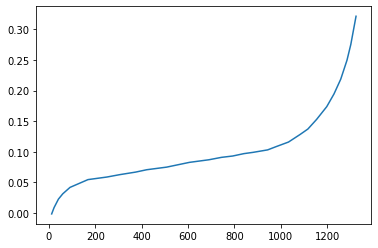

In [8]:
import matplotlib.pyplot as plt
import numpy

x = np.array(x1)
y = np.array(y1)
plt.plot(x,y)
plt.show()

The plot is flipped from our original image, but we can live with that. 

Next, we will look at the pprop RPM data:

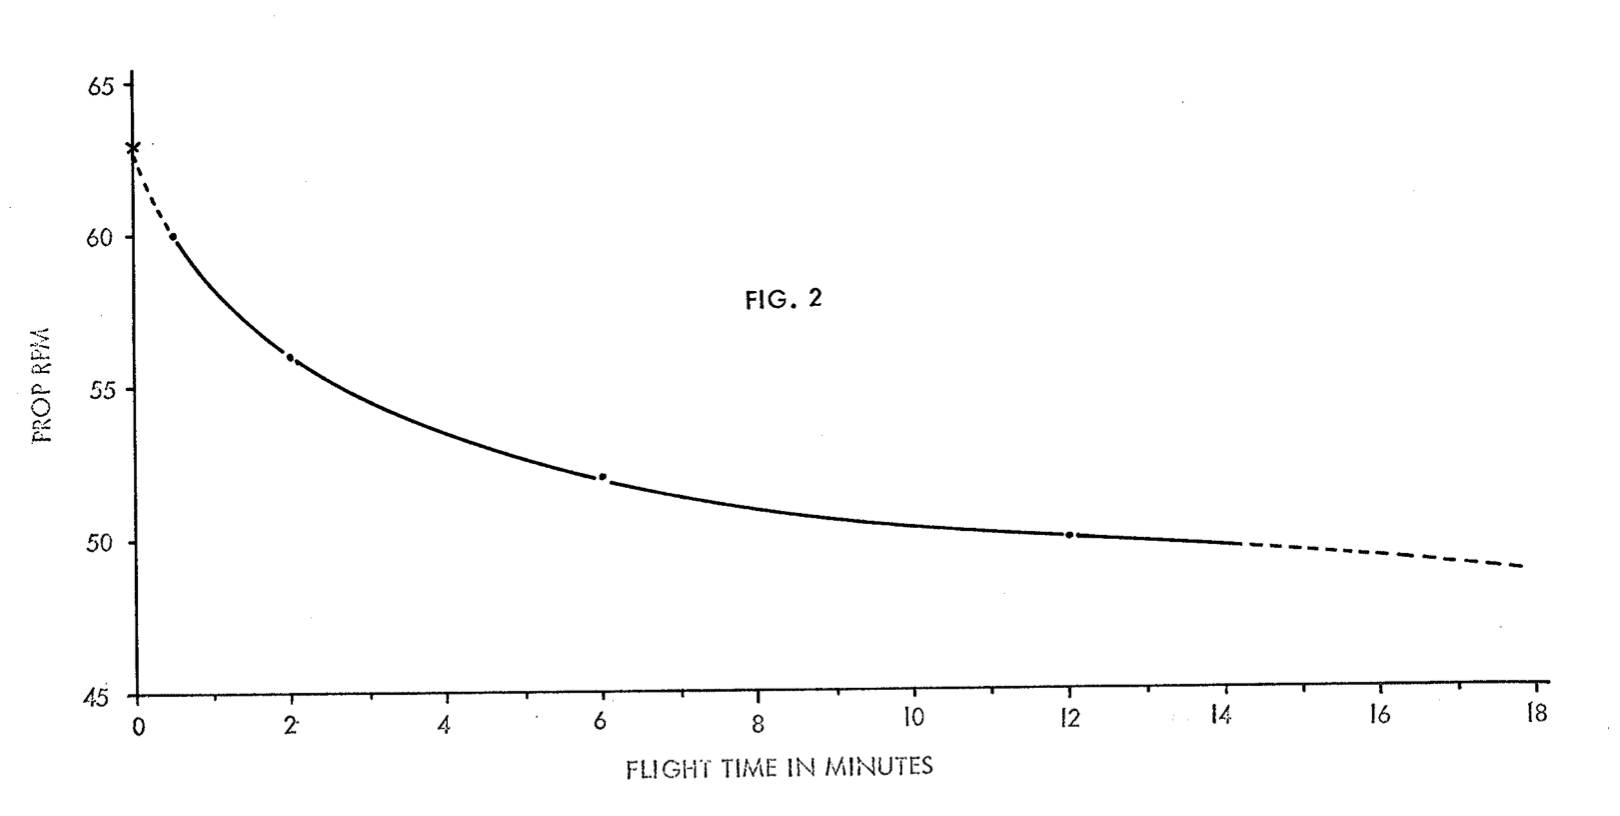

In [9]:
datadir = bpath / '..' / 'mmpower' / 'data'
prop_curve = datadir / 'prop-rpm.json'

rpm_image = datadir / 'prop-rpm.png'
Image(filename=rpm_image)

To simplify this process, we will build a Python function that will load our curve points into separate lists. It will also be handy to be able to spin up a quick plot to make sure things look right:

In [11]:
def get_points(json_path):
    with open(json_path,'r') as fin:
        jdata = json.load(fin)
        points = jdata['datasetColl'][0]['data']
        xp = []
        yp = []
    for p in points:
        item = p['value']
        if not isinstance(item,list): continue
        xp.append(item[0])
        yp.append(item[1])
    return xp, yp

def show_curve(xp, yp):
    x = np.array(xp)
    y = np.array(yp)
    plt.plot(x,y)
    plt.show()
    


Let's try these two functions out:

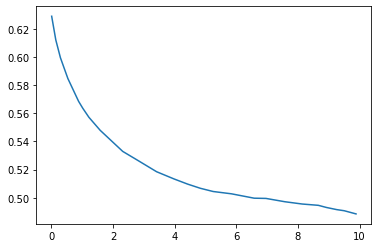

In [13]:
x2, y2 = get_points(prop_curve)
show_curve(x2, y2)

We. need one more pot to get us going: the height plot:

[-0.004900530890846522, 0.2094976955836887, 0.5014293215098302, 0.8224724345137395, 1.3782159733971189, 1.88798786535208, 2.377049180327869, 3.0758998891546594, 3.6996674639752647, 4.456741146957588, 4.901581004608834, 5.2425762790969035, 5.583921591505746, 5.872994574412228, 6.188728778951054, 6.531124205122223, 7.586721894871946, 7.877545067382302, 8.3013243101336, 8.61950878011785, 8.912082142232077, 9.018376990840677, 9.284289131322561, 9.470917682748967, 9.657196196254596, 9.737529899072403, 9.977830931684267, 10.458432996908002, 11.021118954553412, 11.021118954553412, 11.021118954553412, 11.613266437197366, 12.153491628259733, 12.614433230266615, 12.9690799836649, 13.269354180036174, 13.542617116854329, 13.790969021644015, 14.011959628959806, 14.28942302082726] 40
[0.9311008692608382, 5.195437839099235, 9.728428913132255, 13.730237442389594, 18.138965054547576, 21.282305583104836, 23.360655737704917, 25.5790210606149, 27.063181844699844, 28.21918207805846, 28.699609124321803, 28.

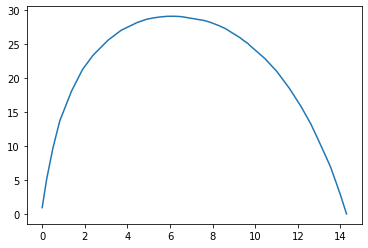

In [14]:
flight_path = datadir / 'flight-profile.json'

x3, y3 = get_points(flight_path)
print(x3, len(x3))
print(y3)
show_curve(x3, y3)

The puzzle now is how to relate these three curves. We cannot do much with the data sets in their current form. We need to convert them into functions that can deliver a dependent value **y** for any independent value **x** We can make that happen by using one of the curve fit routines in **scipy**. Here is one:

In [15]:
from scipy.interpolate import UnivariateSpline

def fit_curve(x, y):
    xi = np.array(x)
    yi = np.array(y)
    order = 4
    f = UnivariateSpline(xi, yi, k=4, s=0)
    return f

The curves I captured have some problems. The torque curve **x** axis runs from a high number to a low one, and the inteploation function will not accept that. Also, I misread the **y** xis and enters scaling values off by a factor of 100, so I need a few utility routines to fix these problems. I also discovered a duplicate point, which will lead to problems.

In [16]:
def reverse_x(x,y):
    nitems = len(x)
    xp = []
    yp = []
    for i in range(nitems):
        j = nitems - i - 1
        xp.append(x[j])
        yp.append(y[j])
    return xp, yp

def scale_y(y, scale_factor):
    yp = []
    for v in y:
        yp.append(v * scale_factor)
    return yp

def filter_dups(x, y):
    xp = []
    yp = []
    for i in range(len(x)):
        if i == 0:
            xprev = x[0]
        else:
            if x[i] == xprev:
                print("found dup at:", i)
                continue                    
        xp.append(x[i])
        yp.append(y[i])
        xprev = x[i]
    print("final length",len(xp))
    return xp, yp

In [17]:
x6,y6 = filter_dups(x3,y3)

found dup at: 29
found dup at: 30
final length 38


In [18]:
x4,y4 = reverse_x(x1,y1)
torque_vs_remaining_turns = fit_curve(x4,y4)
y5 = scale_y(y2, 100)
rpm_vs_time = fit_curve(x2,y5)
height_vs_time = fit_curve(x6,y6)


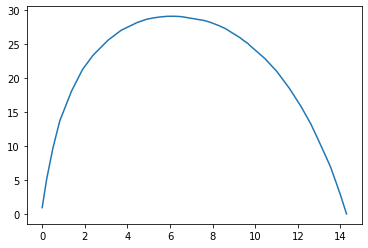

In [111]:
show_curve(x6,y6)

At this point, we have three curves we can use to do further analysis. we know nothing about the model that produced these curves, so details will be hard to come by.

Let's try to find the slope of the height curve, which gives us the vertical velocity of the vehicle over time.:

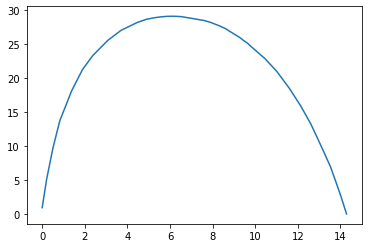

In [112]:
    x = np.array(x6)
    yp = height_vs_time(x)
    y = np.array(yp)
    plt.plot(x,y)
    plt.show()

In [113]:
dh =  height_vs_time.derivative()
xp = np.linspace(0,15,45)
yp = height_vs_time(xp)

In [114]:
xt = x6[10]
print(y6[10], height_vs_time(xt))

28.699609124321803 28.699609124321803


In [115]:
print(xp)
print(yp)
print(height_vs_time(5))
print(dh(5))

[ 0.          0.34090909  0.68181818  1.02272727  1.36363636  1.70454545
  2.04545455  2.38636364  2.72727273  3.06818182  3.40909091  3.75
  4.09090909  4.43181818  4.77272727  5.11363636  5.45454545  5.79545455
  6.13636364  6.47727273  6.81818182  7.15909091  7.5         7.84090909
  8.18181818  8.52272727  8.86363636  9.20454545  9.54545455  9.88636364
 10.22727273 10.56818182 10.90909091 11.25       11.59090909 11.93181818
 12.27272727 12.61363636 12.95454545 13.29545455 13.63636364 13.97727273
 14.31818182 14.65909091 15.        ]
[  1.04292115   7.35894839  12.11179158  15.6116879   18.04327244
  20.23009844  22.05657436  23.39334517  24.52639795  25.5572004
  26.44324727  27.1579842   27.71836215  28.18721851  28.58374226
  28.84313202  29.00528554  29.11661092  29.14433562  29.09966477
  28.98338209  28.80108041  28.58454103  28.30450931  27.89788623
  27.45449205  26.80059373  26.16966115  25.38768651  24.42565498
  23.59752937  22.54491013  21.39585521  20.08511511  18.58315

In [118]:
yp = dh(xp)
print(yp)

[ 2.27345284e+01  1.55840558e+01  1.23357271e+01  8.24001309e+00
  6.57078487e+00  6.11095232e+00  4.52998937e+00  3.50233761e+00
  3.18747478e+00  2.83211417e+00  2.35234560e+00  1.84863885e+00
  1.47410533e+00  1.28917704e+00  9.87712577e-01  5.65383041e-01
  4.09827783e-01  2.17715450e-01 -3.90203666e-02 -2.28909228e-01
 -4.51096664e-01 -5.95742802e-01 -6.88266117e-01 -1.01379359e+00
 -1.26532977e+00 -1.52326550e+00 -2.02606048e+00 -2.10539821e+00
 -1.80186349e+00 -2.48488698e+00 -2.80553570e+00 -3.24733994e+00
 -3.55748388e+00 -4.14583847e+00 -4.62955329e+00 -4.93232287e+00
 -5.29544497e+00 -6.26232119e+00 -6.97435581e+00 -6.60164419e+00
 -8.76109311e+00 -8.88660784e+00 -1.25037053e+01 -3.17181172e+01
 -7.86392968e+01]


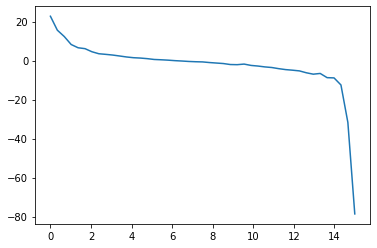

In [119]:
show_curve(xp,yp)

Obviously, those values at the end of this curve are highly suspect. The interpolation scheme uses a linear extrapolation scheme past the ends that depends on the mathematical function used t give us data between data points. In this spline interpolation method a polynomial is generated that goes through our data points, and has constraints  on the derivative at each point to get a smooth curve, There are no real constraints at the ends, other that needing to pass through those end data points. You see theresult here. It is never safe to ask a scheme like this to wander too far past the end of our data!, and it looks bad for our model in that region! The flight actually ended at around 14 minutes for this data so the model hit the floor safely!

## Propeller Power

The rate at which work is done by the propeller is defined as the *propeller power*, $P$:

\begin{equation}
P = 2\pi n Q
\end{equation}

I’m We have the data needed to generate this curve. 